In [1]:
import CMGDB
import CMGDB_utils

import numpy as np
import graphviz
import time

## Compute dynamics from MVM

The multivalued map is represented by a list of edges and a grid size. If there are $N$ elements in the grid, the vertices of the multivalued map are $0, \ldots, N-1$. For dimensions bigger than $1$, the grid elements are indexed by varing the first indexes first, that is, the indexing is $(0, 0)$, $(1, 0)$, $(2, 0)$, etc.

### 1D Example

In [2]:
def f(x):
    a = 1.0
    b = 0.1
    r = 2.1
    return [x[0] * np.exp(r - x[0] - a / (x[0] + b))]

def F(rect):
    return CMGDB.BoxMap(f, rect, padding=True)

lower_bounds = [0.0]
upper_bounds = [2.0]

subdiv_min = 4
subdiv_max = 5
subdiv_init = 4
subdiv_limit = 10000

model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit, lower_bounds, upper_bounds, F)

In [3]:
%%time
morse_graph, map_graph = CMGDB.ComputeConleyMorseGraph(model)

CPU times: user 3.73 ms, sys: 301 μs, total: 4.03 ms
Wall time: 4.19 ms


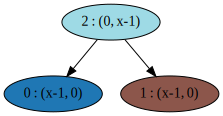

In [4]:
CMGDB.PlotMorseGraph(morse_graph)

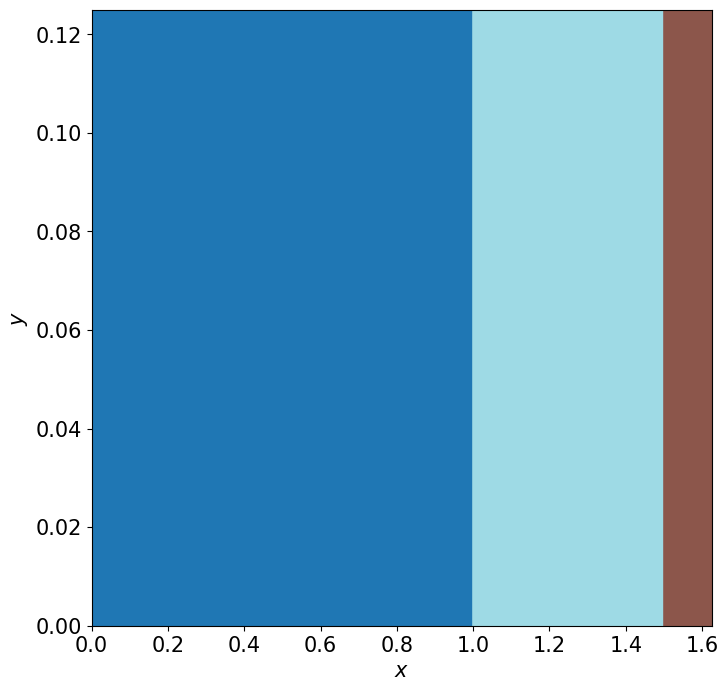

In [5]:
CMGDB.PlotMorseSets(morse_graph, morse_nodes=[1, 2, 0])

In [6]:
map_graph.num_vertices()

20

In [7]:
grid_size = [20]

edges = []
for v1 in range(20):
    for v2 in map_graph.adjacencies(v1):
        edges.append((v1, v2))

print(edges)

[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3), (3, 4), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (6, 7), (6, 8), (6, 9), (6, 10), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (8, 10), (8, 11), (8, 12), (8, 13), (9, 11), (9, 12), (9, 13), (9, 14), (10, 12), (10, 13), (10, 14), (11, 13), (11, 14), (11, 15), (12, 14), (12, 15), (13, 14), (13, 15), (14, 14), (14, 15), (14, 16), (15, 14), (15, 15), (15, 16), (16, 14), (16, 15), (16, 16), (17, 14), (17, 15), (17, 16), (18, 14), (18, 15), (18, 16), (19, 13), (19, 14), (19, 15), (19, 16)]


In [8]:
grid_size = [20]

edges = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3), (3, 4), (4, 2),
         (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (6, 7),
         (6, 8), (6, 9), (6, 10), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (8, 10), (8, 11), (8, 12), (8, 13),
         (9, 11), (9, 12), (9, 13), (9, 14), (10, 12), (10, 13), (10, 14), (11, 13), (11, 14), (11, 15), (12, 14),
         (12, 15), (13, 14), (13, 15), (14, 14), (14, 15), (14, 16), (15, 14), (15, 15), (15, 16), (16, 14), (16, 15),
         (16, 16), (17, 14), (17, 15), (17, 16), (18, 14), (18, 15), (18, 16), (19, 13), (19, 14), (19, 15), (19, 16)]

In [9]:
# Compute Morse graph
mg_vertices, mg_edges, mg_labels, gv_str = CMGDB_utils.morse_graph_from_mvm(edges, grid_size)

The vertices, edges, and labels are returned as lists. A string is also returned representing a Graphviz graph to plot the graph.

In [10]:
mg_vertices

[0, 1, 2]

In [11]:
mg_edges

[(2, 0), (2, 1)]

In [12]:
mg_labels

['(x-1, 0)', '(x-1, 0)', '(0, x-1)']

In [13]:
print(gv_str)

digraph {
0 [label="0 : (x-1, 0)", shape=ellipse, style=filled, fillcolor="#1f77b4ff", margin="0.11, 0.055"];
1 [label="1 : (x-1, 0)", shape=ellipse, style=filled, fillcolor="#8c564bff", margin="0.11, 0.055"];
2 [label="2 : (0, x-1)", shape=ellipse, style=filled, fillcolor="#9edae5ff", margin="0.11, 0.055"];
{rank=same; 0 1 }; 
2 -> 0;
2 -> 1;
}



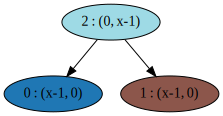

In [14]:
# Use graphviz to plot the graph
graphviz.Source(gv_str)

In [15]:
# Compute lattice of attractors
att_vertices, att_edges, att_labels, att_gv_str, att_types = CMGDB_utils.lattice_attractors_from_mvm(edges, grid_size)

In [16]:
att_vertices

[0, 1, 2, 3, 4]

In [17]:
att_edges

[(1, 0), (2, 0), (3, 1), (3, 2), (4, 3)]

In [18]:
att_labels

['{ }', '{0}', '{1}', '{0, 1}', '{0, 1, 2}']

In [19]:
att_types

[0, 2, 2, 1, 2]

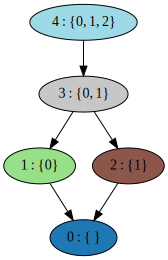

In [20]:
graphviz.Source(att_gv_str)

In [21]:
attractors = CMGDB_utils.attractors_from_mvm(edges, grid_size)

In [22]:
attractors

[[],
 {0, 1},
 {14, 15, 16},
 {0, 1, 14, 15, 16},
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}]

In [23]:
# Compute lattice of repellers
rep_vertices, rep_edges, rep_labels, rep_gv_str = CMGDB_utils.lattice_repellers_from_mvm(edges, grid_size)

In [24]:
rep_vertices

[0, 1, 2, 3, 4]

In [25]:
rep_edges

[(1, 0), (2, 0), (3, 1), (3, 2), (4, 3)]

In [26]:
rep_labels

['{0, 1, 2}', '{1, 2}', '{0, 2}', '{2}', '{ }']

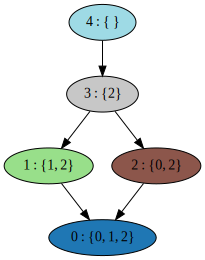

In [27]:
graphviz.Source(rep_gv_str)

In [28]:
repellers = CMGDB_utils.repellers_from_mvm(edges, grid_size)

In [29]:
repellers

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19},
 {2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19},
 {0, 1, 2, 3, 4, 5},
 {2, 3, 4, 5},
 []]

## 2D Example

In [30]:
def f(x):
    return [x[0] / (2.0 - x[0]), x[1] / (2.0 - x[1])]

def F(rect):
    return CMGDB.BoxMap(f, rect, padding=False)

subdiv_min = 2
subdiv_max = 3
subdiv_init = 2
subdiv_limit = 10000
lower_bounds = [0.0, 0.0]
upper_bounds = [1.0, 1.0]

model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit, lower_bounds, upper_bounds, F)

In [31]:
%%time
morse_graph, map_graph = CMGDB.ComputeConleyMorseGraph(model)

CPU times: user 1.16 ms, sys: 119 μs, total: 1.28 ms
Wall time: 1.29 ms


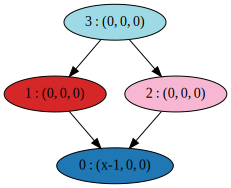

In [32]:
CMGDB.PlotMorseGraph(morse_graph)

In [33]:
map_graph.num_vertices()

4

In [34]:
grid_size = [2, 2]

edges = []
for v1 in range(4):
    for v2 in map_graph.adjacencies(v1):
        edges.append((v1, v2))

print(edges)

[(0, 0), (1, 0), (1, 1), (2, 0), (2, 2), (3, 0), (3, 1), (3, 2), (3, 3)]


In [35]:
grid_size = [2, 2]

edges = [(0, 0), (1, 0), (1, 1), (2, 0), (2, 2), (3, 0), (3, 1), (3, 2), (3, 3)]

In [36]:
mg_vertices, mg_edges, mg_labels, gv_str = CMGDB_utils.morse_graph_from_mvm(edges, grid_size)

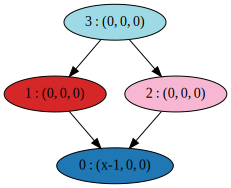

In [37]:
graphviz.Source(gv_str)

In [40]:
att_vertices, att_edges, att_labels, gv_str, att_types = CMGDB_utils.lattice_attractors_from_mvm(edges, grid_size)

In [42]:
att_types

[0, 2, 0, 0, 0, 0]

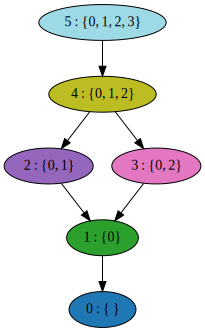

In [41]:
graphviz.Source(gv_str)

In [43]:
attractors = CMGDB_utils.attractors_from_mvm(edges, grid_size)

In [44]:
attractors

[[], {0}, {0, 1}, {0, 2}, {0, 1, 2}, {0, 1, 2, 3}]

In [45]:
rep_vertices, rep_edges, rep_labels, gv_str = CMGDB_utils.lattice_repellers_from_mvm(edges, grid_size)

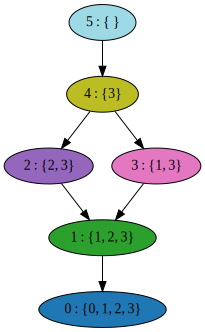

In [46]:
graphviz.Source(gv_str)

In [47]:
repellers = CMGDB_utils.repellers_from_mvm(edges, grid_size)

In [48]:
repellers

[{0, 1, 2, 3}, {1, 2, 3}, {2, 3}, {1, 3}, {3}, []]